In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_data(name,val):
    with open(name, 'r') as f:
        data = []
        lines = f.readlines()
        for line in lines:
            list = line.strip('\n').split(' ')
            list = [float(x) for x in list if x != '']
            if val==1:
                list.insert(0,1)
            data.append(list)
    return data

第一组数据点的分布：


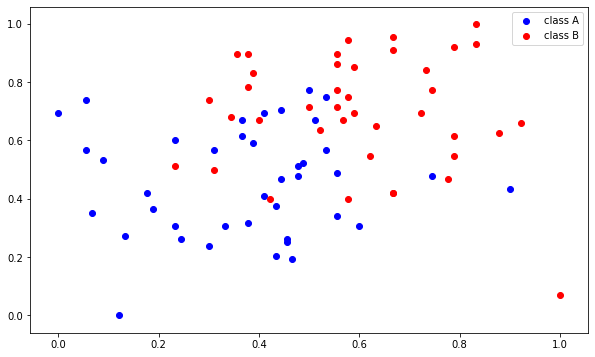

In [3]:
#读取数据
x1 = get_data('ex4x.dat',0)
y1 = get_data('ex4y.dat',0)
X = np.array(x1)
y = np.array(y1).transpose().squeeze()
#minmax正则化：否则数据不好收敛，到nan
min1=np.min(X[:,0])
max1=np.max(X[:,0])
min2=np.min(X[:,1])
max2=np.max(X[:,1])
m,n=np.shape(X)

for i in range(m):
    X[i][0]=(X[i][0]-min1)/(max1-min1)
    X[i][1]=(X[i][1]-min2)/(max2-min2)
print("第一组数据点的分布：")

plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='class A')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='class B')
plt.legend();

In [4]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit_gd(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
      
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
                
    def fit_sgd(self, X, y):
        self.num_iter=2000
        if self.fit_intercept:
            X = self.__add_intercept(X)       
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        for j in range(self.num_iter):
            for i in range(X.shape[0]):
                z = np.dot(X[i], self.theta)
                h = self.__sigmoid(z)
                gradient = np.dot(X.T, (h - y)) / y.size
                self.theta -= self.lr * gradient
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                loss = self.__loss(h, y)
                
                if(self.verbose ==True and i % 10000 == 0):
                    print(f'loss: {loss} \t')
                
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

准确率： 0.8125
权重： [-7.33113606  6.67533482  6.99197188]


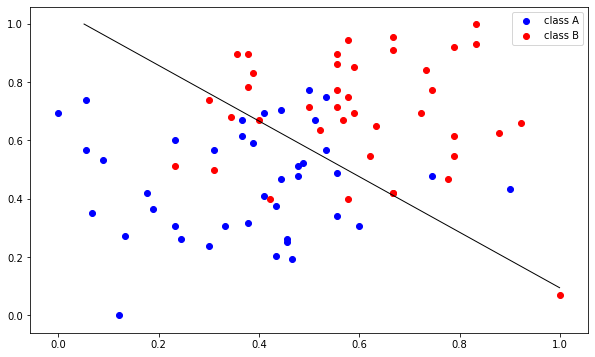

In [5]:
model = LogisticRegression(lr=0.1, num_iter=300000)
model.fit_gd(X, y)

preds = model.predict(X)
print("准确率：",(preds == y).mean())
print("权重：",model.theta)
#绘出结果
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='class A')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='class B')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');

第一组数据点的分布：


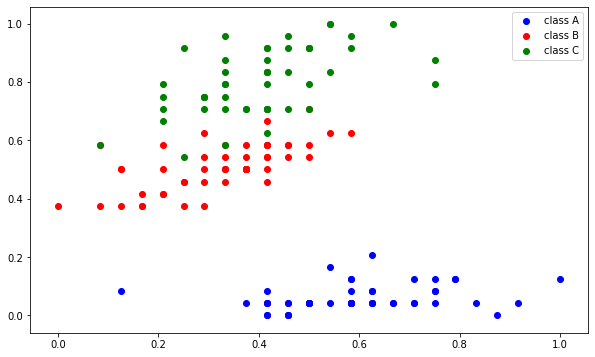

In [6]:
#读取数据
x1 = get_data('data/iris_x.dat',0)
y1 = get_data('data/iris_y.dat',0)
X = np.array(x1)
y = np.array(y1).transpose().squeeze()
#minmax正则化：否则数据不好收敛，到nan
min1=np.min(X[:,0])
max1=np.max(X[:,0])
min2=np.min(X[:,1])
max2=np.max(X[:,1])
m,n=np.shape(X)
for i in range(m):
    X[i][0]=(X[i][0]-min1)/(max1-min1)
    X[i][1]=(X[i][1]-min2)/(max2-min2)
print("第一组数据点的分布：")

plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='class A')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='class B')
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], color='g', label='class C')
plt.legend();

In [7]:
def one_hot_encoder(y):
    a = np.zeros((y.shape[0], 3))
    for idx in range(y.shape[0]):
        a[idx][int(y[idx])]=1
    return a
print("one-hot encoded y:")
yy=np.array(y1)#正常
print(one_hot_encoder(yy))

one-hot encoded y:
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0

In [8]:
def softmax(z):
    log_c = np.max(z, axis = 1) * (-1)
    log_c = log_c.reshape(-1, 1)
    prob = np.exp(z + log_c)
    prob = prob / np.exp(z + log_c).sum(axis = 1).reshape(-1, 1)
    return np.clip(prob, 1e-15, 1-1e-15)


In [9]:
def net_input(X, weight):
    return X.dot(weight[1:]) + weight[0]

In [10]:
def compute_cost(X, y, weight):#交叉熵
    y_pred_enc = one_hot_encoder(y)
    z = net_input(X, weight)
    activation = softmax(z)
    cross_entropy = - np.sum(np.log(activation) * (y_pred_enc), axis = 1)
    return np.mean(cross_entropy)


In [11]:
epochs = 1000
learning_rate = 0.05
def train(X, y, epochs, learning_rate):
    weight = np.random.normal(loc = 0, scale = 0.01, size = (X.shape[1] + 1, len(np.unique(y))))
    cost_array = []
    y_encoded = one_hot_encoder(y)
    for epoch in range(epochs):
        z = net_input(X, weight) 
        activation = softmax(z)
        diff = activation - y_encoded 
        grad = np.dot(X.T, diff)
        weight[1:] -= learning_rate * grad
        weight[0] -= learning_rate * np.sum(diff, axis = 0)
        
        cost = compute_cost(X, y, weight)
        cost_array.append(cost)
    return weight, cost_array

In [12]:
learned_w, cost_array = train(X, yy, epochs, learning_rate)

print("Learned weights:")
print(learned_w)

Learned weights:
[[  6.77415087   4.64279354 -11.40311525]
 [  8.28422766  -0.70917267  -7.55853665]
 [-23.5466352   -2.73496264  26.28921272]]


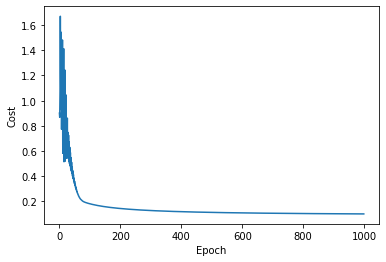

In [13]:
plt.plot(range(len(cost_array)), cost_array)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.show()

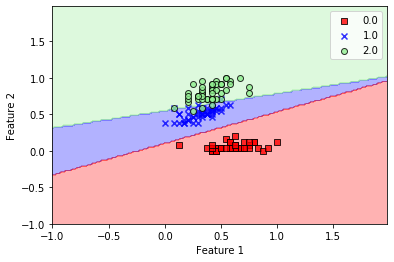

In [14]:
from matplotlib.colors import ListedColormap
# Full prediction function
def full_predict(X, weight):
    z = net_input(X, weight)
    activation = softmax(z)
    y_predicted = activation.argmax(axis = 1)
    return y_predicted

def plot_decision_regions(X, y, weight, resolution = 0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:3])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = full_predict(np.array([xx1.ravel(), xx2.ravel()]).T, weight)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8, c = colors[idx], marker = markers[idx], label = cl, edgecolor = 'black')

plot_decision_regions(X, y, learned_w)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()